## Extrae la informacion

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"D:\alex_\Documents\Programacion\Bases de datos\Loteria Nacional\Mayor\_LLEVAR\BASE_Valores_Premios.xlsx", dtype=object)
df_mayor = df[df['PREMIO'] >= 300000]  # Compara con una cadena '300000'

## Obten tu df

In [3]:
premios_a_filtrar = [1200, 5000, 10000]
df_filtrado = df[~df['PREMIO'].isin(premios_a_filtrar)]
df_pivot_todos = df_filtrado.pivot_table(index = "ORIGEN",columns="PREMIO", values = "Valor", aggfunc=lambda x: x).reset_index()
df_pivot_todos["ORIGEN"] = df_pivot_todos["ORIGEN"].str.replace('Mayor', '')

df_pivot_todos.tail()

PREMIO,ORIGEN,3000,8000,25000,40000,80000,300000,850000,7000000
46,3912,"[57, 252, 319, 335, 551, 653, 898, 1005, 1024,...","[409, 7361, 13165, 19875, 25547, 27785, 28330,...","[1152, 16308, 25939, 28539, 30120, 36001, 4251...","[7981, 9044, 17238, 21300, 27724]","[31870, 37688, 38981, 52796]",39220,16913,43967
47,3913,"[211, 377, 530, 574, 628, 803, 850, 853, 1066,...","[303, 2197, 3411, 5567, 9328, 20802, 28841, 47...","[4200, 18980, 20888, 21104, 33146, 37712, 4379...","[9527, 11108, 17461, 31985, 40242]","[19577, 36878, 56415, 57372]",14774,42759,58939
48,3914,"[79, 141, 253, 254, 402, 462, 478, 521, 629, 6...","[1401, 4064, 21841, 22232, 23523, 27530, 28428...","[21535, 29791, 29935, 30166, 31869, 32544, 446...","[31822, 36177, 40262, 48429, 59380]","[28278, 36815, 38120, 53281]",24520,26911,14507
49,3915,"[250, 297, 394, 599, 614, 668, 772, 795, 1133,...","[3266, 9003, 9170, 9175, 10965, 18304, 19909, ...","[1354, 2638, 6247, 6270, 14329, 22490, 25119, ...","[2299, 16456, 32725, 36993, 40283]","[21369, 25845, 29713, 36307]",55768,13627,55186
50,3916,"[12, 73, 80, 216, 352, 449, 479, 783, 795, 955...","[7973, 9846, 14099, 15492, 18214, 18486, 20085...","[5287, 8192, 16361, 19692, 20202, 21537, 27250...","[306, 49973, 51589, 54489, 55365]","[14500, 46735, 52149, 59465]",56959,23600,11828


## Grafica de los mas importantes

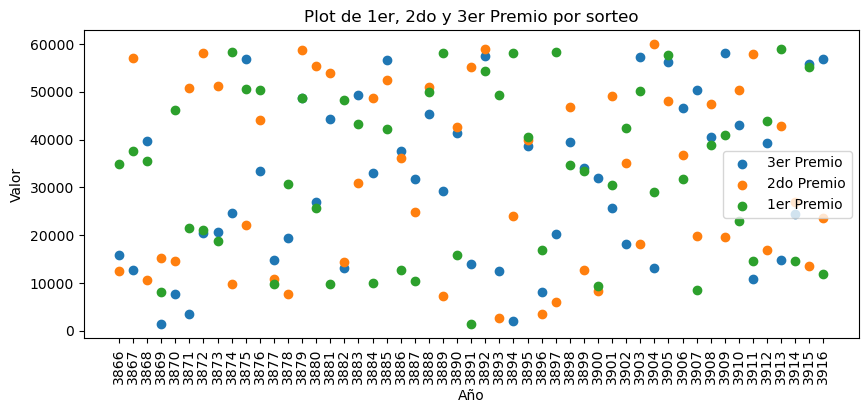

In [4]:
plt.figure(figsize=(10, 4))

plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[300000], label = "3er Premio")
plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[850000], label = "2do Premio")
plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[7000000], label = "1er Premio")

plt.xlabel('Año')
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.title('Plot de 1er, 2do y 3er Premio por sorteo')
plt.legend()
plt.show()

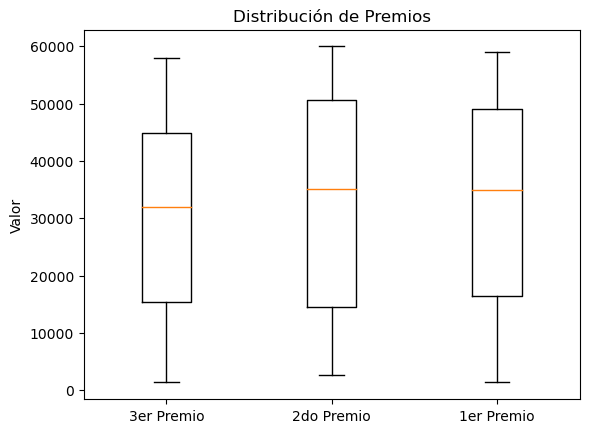

In [5]:
# df_pivot_todos.boxplot(column=[300000, 850000, 7000000])
plt.boxplot([df_pivot_todos[300000], df_pivot_todos[850000],  df_pivot_todos[7000000]], labels=["3er Premio", "2do Premio", "1er Premio"])

plt.title('Distribución de Premios')
plt.ylabel('Valor')
plt.show()

## Analisis

1. Árboles de Decisión y Bosques Aleatorios:
Pueden adaptarse a patrones no lineales y son robustos frente a datos ruidosos. Los bosques aleatorios, en particular, pueden mejorar la precisión y generalización.
2. Redes Neuronales:
Especialmente las redes neuronales recurrentes (RNN) y las redes neuronales de memoria a largo plazo (LSTM) son eficaces para modelar secuencias temporales y pueden capturar patrones complejos y relaciones no lineales.
3. Modelos de Serie Temporal:
Modelos específicos para series temporales, como ARIMA o modelos LSTM, son diseñados específicamente para la predicción de series temporales y pueden ser efectivos en la identificación de patrones temporales.

## Random Forest

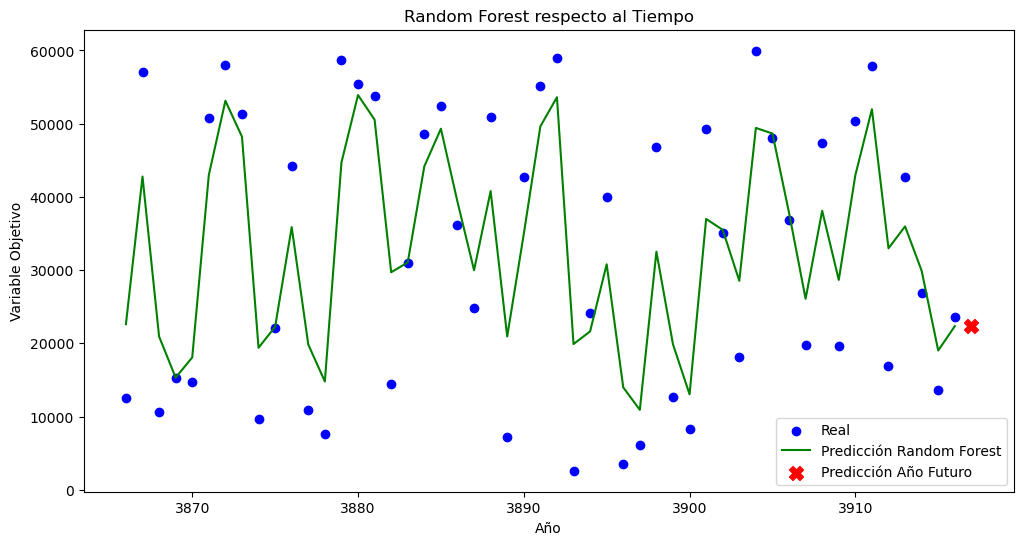

Predicción para el premio Futuro: 22342.706666666665


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#################################################
df_analisis = df_pivot_todos
target_variable = df_analisis[850000]
proximo_premio = 3917
#################################################

years = np.array(df_analisis["ORIGEN"].astype(int))
X = years.reshape(-1, 1)
y = target_variable

# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=150, random_state=1000)
rf_model.fit(X, y)

# predicción para el tiempo futuro
X_future = np.array([[proximo_premio]])
y_pred_future = rf_model.predict(X_future)

# predicciones
y_pred = rf_model.predict(X)

#################################################

plt.figure(figsize=(12, 6))

# variable objetivo real: X
plt.scatter(X.flatten(), y, label='Real', color='blue')

# predicciones del modelo de Random Forest
plt.plot(X.flatten(), y_pred, label='Predicción Random Forest', color='green')

# predicción para el tiempo futuro
plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='red', marker='X', s=100)

plt.xlabel('Año')
plt.ylabel('Variable Objetivo')
plt.title('Random Forest respecto al Tiempo')
plt.legend()
plt.show()

print(f'Predicción para el premio Futuro: {y_pred_future[0]}')


In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Desviacion, entre mas cercana a 0 mejor
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R cuadrado entre mas cercano a 1 mejor
r2 = r2_score(y, y_pred)
print(f'R^2 Score: {r2}')


Root Mean Squared Error (RMSE): 8332.860977111024
R^2 Score: 0.8019214916702748


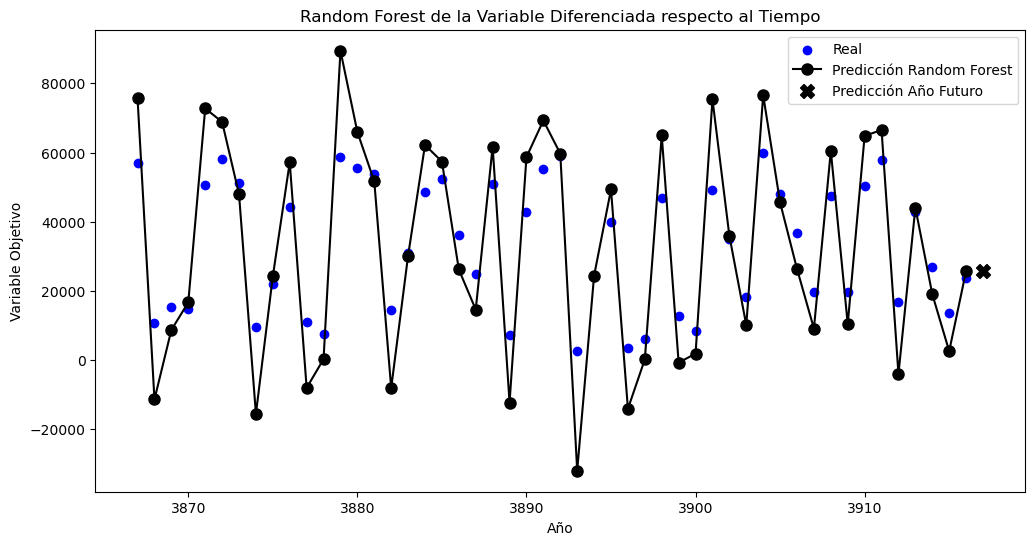

Predicción para el premio Futuro: [25752.48]


In [184]:
#################################################
df_analisis = df_pivot_todos
target_variable = df_analisis[850000]
proximo_premio = 3917
#################################################

years = np.array(df_analisis["ORIGEN"].astype(int))
X = years.reshape(-1, 1)[1:]
y = target_variable.diff().dropna()

# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=150, random_state=1000)
rf_model.fit(X, y)

# predicción para el tiempo futuro
X_future = np.array([[proximo_premio]])
y_pred_future_diff = rf_model.predict(X_future)

# predicciones
y_pred_diff = rf_model.predict(X)

#################################################

plt.figure(figsize=(12, 6))

# variable objetivo real: X Dierenciada
# plt.scatter(X.flatten(), y, label='Real (Diff)', color='orange')

# variable objetivo real: X
plt.scatter(X.flatten(), target_variable[1:], label='Real', color='blue')

# predicciones del modelo de Random Forest
# plt.plot(X.flatten(), y_pred_diff + y, label='Predicción Random Forest (Diff)', color='green')

# predicción para el tiempo futuro
# plt.scatter(X_future.flatten(), y_pred_future_diff, label='Predicción Año Futuro (Diff)', color='green', marker='X', s=100)

# predicciones del modelo de Random Forest
totales = y_pred_diff + target_variable[1:]
plt.plot(X.flatten(), totales, label='Predicción Random Forest', color='black', marker='o', markersize=8)

# Predicción para el tiempo futuro dentro del MODELO ARIMA
y_pred_future = y_pred_future_diff + target_variable.iloc[-1]
plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='black', marker='X', s=100)

plt.xlabel('Año')
plt.ylabel('Variable Objetivo')
plt.title('Random Forest de la Variable Diferenciada respecto al Tiempo')
plt.legend()
# plt.ylim(0,60000)
plt.show()

# print(f'Predicción para el premio Futuro (Diff): {y_pred_future_diff[0]}')
print(f'Predicción para el premio Futuro: {y_pred_future}')



In [174]:
# Desviacion, entre mas cercana a 0 mejor
mse = mean_squared_error(target_variable[1:], totales)
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R cuadrado entre mas cercano a 1 mejor
r2 = r2_score(target_variable[1:], totales)
print(f'R^2 Score: {r2}')

Root Mean Squared Error (RMSE): 14307.373019117565
R^2 Score: 0.4140421220752172


In [8]:
premios_principales = [300000, 850000, 7000000]
df_filtrado_principales = df[df['PREMIO'].isin(premios_principales)]
df_pivot_principales = df_filtrado_principales.pivot_table(index = "ORIGEN",columns="PREMIO", values = "NUMERO", aggfunc=lambda x: x).reset_index()
df_pivot_principales["ORIGEN"] = df_pivot_principales["ORIGEN"].str.replace('Mayor', '')

df_pivot_principales.tail()

PREMIO,ORIGEN,300000,850000,7000000
46,3912,39220,16913,43967
47,3913,14774,42759,58939
48,3914,24520,26911,14507
49,3915,55768,13627,55186
50,3916,56959,23600,11828


In [9]:
df_digitos_3 = df_pivot_principales[["ORIGEN",300000]]
df_digitos_2 = df_pivot_principales[["ORIGEN",850000]]
df_digitos_1 = df_pivot_principales[["ORIGEN",7000000]]


# obtener el i-ésimo dígito
get_digit = lambda number, i: int(str(number)[i]) if len(str(number)) > i else None
# num_digits = max(len(str(number)) for number in df[300000])
num_digits = 5

#######################################

df_digitos_3c = df_digitos_3.copy()

for i in range(num_digits):
   df_digitos_3c[f'Digito_{i+1}'] = df_digitos_3c[300000].apply(lambda x: get_digit(x, i))

df_digitos_2c = df_digitos_2.copy()

for i in range(num_digits):
   df_digitos_2c[f'Digito_{i+1}'] = df_digitos_2c[850000].apply(lambda x: get_digit(x, i))
   
df_digitos_1c = df_digitos_1.copy()

for i in range(num_digits):
   df_digitos_1c[f'Digito_{i+1}'] = df_digitos_1c[7000000].apply(lambda x: get_digit(x, i))
   

df_digitos_1c.tail(5)


PREMIO,ORIGEN,7000000,Digito_1,Digito_2,Digito_3,Digito_4,Digito_5
46,3912,43967,4,3,9,6,7
47,3913,58939,5,8,9,3,9
48,3914,14507,1,4,5,0,7
49,3915,55186,5,5,1,8,6
50,3916,11828,1,1,8,2,8


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes un DataFrame llamado df_digitos_3c
# Asegúrate de tener las columnas 'ORIGEN' y 'Digito_1', 'Digito_2', ..., 'Digito_5'

# Crear una lista de los nombres de las columnas de los dígitos
digit_columns = ['Digito_1', 'Digito_2', 'Digito_3', 'Digito_4', 'Digito_5']

#################################################
df_analisis = df_digitos_2c
proximo_premio = 3917
#################################################

# Crear un gráfico para cada dígito
for digit_column in digit_columns:
    years = np.array(df_analisis["ORIGEN"].astype(int))
    target_variable = df_analisis[digit_column]

    X = years.reshape(-1, 1)
    y = target_variable

    # Modelo de Random Forest
    rf_model = RandomForestRegressor(n_estimators=200, random_state=1000)
    rf_model.fit(X, y)

    # Predicción para el tiempo futuro
    X_future = np.array([[proximo_premio]])
    y_pred_future = rf_model.predict(X_future)

    # Predicciones del modelo
    y_pred = rf_model.predict(X)

    # # Crear el gráfico
    # plt.figure(figsize=(12, 6))

    # # Variable objetivo real: X
    # plt.scatter(X.flatten(), y, label='Real', color='blue')

    # # Predicciones del modelo de Random Forest
    # plt.plot(X.flatten(), y_pred, label='Predicción Random Forest', color='green')

    # # Predicción para el tiempo futuro
    # plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='red', marker='X', s=100)

    # plt.xlabel('Año')
    # plt.ylabel('Variable Objetivo')
    # plt.title(f'Random Forest respecto al Tiempo - Dígito {digit_column[-1]}')
    # plt.legend()
    # plt.show()

    print(f'Predicción para el Digito {digit_column[-1]} Futuro: {y_pred_future[0]}')


Predicción para el Digito 1 Futuro: 1.83
Predicción para el Digito 2 Futuro: 3.205
Predicción para el Digito 3 Futuro: 6.275
Predicción para el Digito 4 Futuro: 0.76
Predicción para el Digito 5 Futuro: 2.15


## Modelo de Serie Temporal: ARIMA

Predicción para el proximo premio (diff): 31385.87
Predicción para el premio Futuro: 54985.87


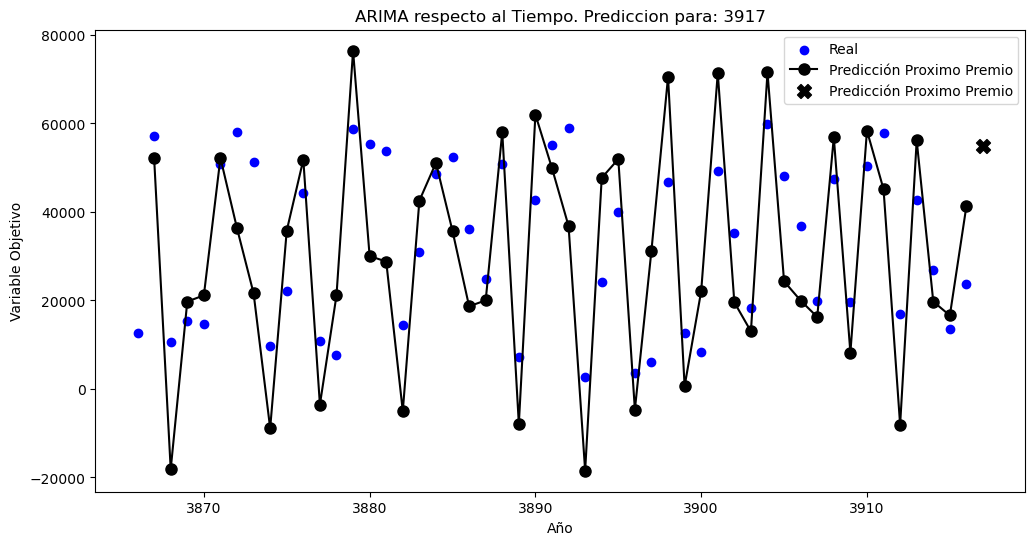

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#################################################
df_analisis = df_pivot_todos
target_variable = df_analisis[850000]
proximo_premio = 3917
#################################################

# Convertir la variable objetivo a tipo numérico
y = pd.to_numeric(target_variable, errors='coerce')

# Asegurarse de que no hay valores nulos en la variable objetivo
y = y.dropna()

# Crear la serie temporal para los años
years = np.array(df_analisis["ORIGEN"].astype(int))

# Ajustar un modelo ARIMA
order = (1, 1, 2)  
model = ARIMA(y, order=order)
result = model.fit()

# Obtener el proximo premio
ultimo_anio = years[-1]
proximo_anio = ultimo_anio + 1
forecast_steps = 1
forecast_mean = result.get_forecast(steps=forecast_steps).predicted_mean

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Variable objetivo real: X
plt.scatter(years, y, label='Real', color='blue')

# Variable Diferenciada
y_diferenciada = y.diff().dropna()
# plt.scatter(years[1:], y_diferenciada, label='Valores Diferenciados', color='orange')

# Modelo ARIMA
# plt.plot(years, result.fittedvalues, label='Modelo ARIMA (diff)', color='green')

# Predicción para el tiempo futuro dentro del MODELO ARIMA
# plt.scatter(proximo_anio, forecast_mean, label='Predicción Proximo Premio (diff)', color='green', marker='X', s=100)
print(f'Predicción para el proximo premio (diff): {round(forecast_mean.values[0],2)}')

# Modelo ARIMA + Variable Diferenciada = 
fitted_values = result.fittedvalues
total_values = y_diferenciada + fitted_values
plt.plot(years, total_values, label='Predicción Proximo Premio', color='black', marker='o', markersize=8)

# Predicción para el tiempo futuro dentro del MODELO ARIMA
differences_used = result.model.order[1]
forecast_untransformed = result.get_forecast(steps=1).predicted_mean.values[0]
for i in range(differences_used):
    forecast_untransformed += df_analisis[850000].iloc[-(i+1)]

plt.scatter(proximo_anio, forecast_untransformed, label='Predicción Proximo Premio', color='black', marker='X', s=100)

print(f'Predicción para el premio Futuro: {round(forecast_untransformed, 2)}')

plt.xlabel('Año')
plt.ylabel('Variable Objetivo')
plt.title(f'ARIMA respecto al Tiempo. Prediccion para: {proximo_anio}')
plt.legend()
plt.show()

In [128]:
# Desviacion, entre mas cercana a 0 mejor
mse = mean_squared_error(y[1:], total_values[1:])
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R cuadrado entre mas cercano a 1 mejor
r2 = r2_score(y[1:], total_values[1:])
print(f'R^2 Score: {r2}')


Root Mean Squared Error (RMSE): 18062.941648000553
R^2 Score: 0.0660501533612382
